In [2]:
# empty list
data_list = []

# need to ensure a clean run each time 
with open('day8_data.txt') as f:
    for line in f:
        data_list.append(line.split(','))

# convert to ints
test_case = [int(x) for x in data_list[0]]

In [4]:
#img size
img_size = 25*6

In [13]:
len(str(test_case[0]))

15000

In [15]:
15000 / img_size # 100 different images fo 150 each

100.0

In [66]:
dict_img = {}
for i in range(100):
    start = i*150+1
    end = (i+1)*150+1
    dict_img[i] = str(test_case)[start:end]

In [67]:
len(dict_img[0])

150

In [69]:
len(dict_img[99])

150

In [72]:
# building a test list
dict_int = {}
for i in dict_img.keys():
    
    test_list = [int(x) for x in dict_img[i]]
        
    dict_int[i] = np.reshape(test_list, (6, 25))

In [75]:
from matplotlib import pyplot as plt
import numpy as np

In [74]:
dict_int[i]

array([[1, 0, 2, 0, 0, 0, 1, 2, 0, 0, 1, 1, 2, 2, 0, 2, 2, 1, 2, 1, 1, 2,
        1, 1, 2],
       [1, 1, 0, 2, 0, 1, 1, 0, 0, 0, 2, 0, 1, 1, 1, 2, 2, 1, 1, 2, 1, 0,
        0, 1, 2],
       [1, 2, 0, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 0, 1, 1, 1, 2, 1, 2, 2,
        0, 1, 0],
       [1, 0, 1, 2, 0, 0, 0, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 1, 1, 0,
        0, 1, 1],
       [1, 2, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 2, 0, 2, 1, 2, 0, 0, 1, 2, 1,
        0, 2, 1],
       [1, 1, 2, 0, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0,
        1, 1, 0]])

In [78]:
### Find the one with least 0s

In [79]:
zero_dict = {}

for i in dict_img.keys():
    
    zero_count = [x for x in dict_img[i] if x == '0']
    zero_dict[i] = len(zero_count)

In [81]:
min(zero_dict.items(), key=lambda x: x[1]) 

(21, 7)

In [82]:
zero_dict[21]

7

In [83]:
# now calculate part 1
len([x for x in dict_img[21] if x == '1']) * len([x for x in dict_img[21] if x == '2'])


2250

### Moving into Part 2: 

0 = black
1 = white
2 = transparent

- Any transparents will be overwritten....basically need to loop over each array, and any 2s will be ignored....


Approach: 

- first find the max val of each point based on layer (skip across all pixels, and then all layers)
- next do quick math to determine vals....basically ignore any 2s & take value
- then reshape into proper output (width x height

In [99]:
testing = '0222112222120000'

In [104]:
pixels = 4
layers = 4
layer_stack_dict = {} # store output & do quick math

for i in range(pixels):
    my_list = []
    for j in range(layers):
        
        app_val = testing[i+j*pixels]
        my_list.append(app_val)
        
    layer_stack_dict[i] = my_list      

In [106]:
layer_stack_dict

{0: ['0', '1', '2', '0'],
 1: ['2', '1', '2', '0'],
 2: ['2', '2', '1', '0'],
 3: ['2', '2', '2', '0']}

In [109]:
final_list = []
for i in range(pixels):
    val = '2'
    spec_layer = layer_stack_dict[i][::-1]
    while val == '2':
        val = spec_layer.pop()
    
    # add to final section
    final_list.append(val)

In [111]:
# restructure as array: 
answer = np.reshape(final_list, (2, 2))

In [113]:
answer # works with test case!

array([['0', '1'],
       ['1', '0']], dtype='<U1')

In [117]:
# with final data///will bne slow
pixels = 150
layers = 100
layer_stack_dict = {} # store output & do quick math

for i in range(pixels):
    my_list = []
    for j in range(layers):
        
        app_val = str(test_case[0])[i+j*pixels]
        my_list.append(app_val)
        
    layer_stack_dict[i] = my_list    

In [118]:
final_list = []
for i in range(pixels):
    val = '2'
    spec_layer = layer_stack_dict[i][::-1]
    while val == '2':
        val = spec_layer.pop()
    
    # add to final section
    final_list.append(val)

In [129]:
# restructure as array: 
int_list = [int(x) for x in final_list]
answer = np.reshape(int_list, (6, 25))

In [130]:
from matplotlib import pyplot as plt
import numpy as np

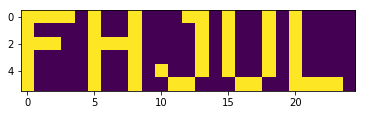

In [131]:
plt.imshow(answer)